# Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
import warnings
import time
import matplotlib.cm as cm

warnings.filterwarnings("ignore")
plt.rcParams["figure.autolayout"] = True

#  4 PCA

## 4.1 pca

In [2]:
#omport the cleaned data
crash_pca = pd.read_csv("crash_result1207.csv")

In [3]:
from sklearn.decomposition import PCA
from numpy.testing import assert_array_almost_equal

In [4]:
crash_pca.columns

Index(['TRAFFICWAY_TYPE', 'FIRST_CRASH_TYPE', 'TRAFFIC_CONTROL_DEVICE',
       'DRIVER_AGE', 'DRIVER_SEX', 'CRASH_MONTH', 'CRASH_DAY_OF_WEEK',
       'CRASH_HOUR', 'NUM_UNITS', 'POSTED_SPEED_LIMIT', 'ROAD_DEFECT',
       'ROADWAY_SURFACE_COND', 'LIGHTING_CONDITION', 'WEATHER_CONDITION',
       'DEVICE_CONDITION', 'ALIGNMENT', 'STREET_DIRECTION'],
      dtype='object')

In [5]:
#pca
number_c=17
pca_crash = PCA(n_components=number_c)  ##Estimates the components
pca_crash.fit(crash_pca)

PCA(n_components=17)

In [6]:
df_numerical = crash_pca
df_mean = np.mean(df_numerical, axis = 0)
df_std = np.std(df_numerical, axis = 0)
df_standardized = (df_numerical - df_mean) / df_std

In [7]:
U, S, VT = np.linalg.svd(df_standardized, full_matrices = False)
U, S, VT

(array([[-1.23923352e-03,  7.98803136e-04, -1.13454406e-03, ...,
          8.28973299e-04, -1.34264172e-03,  1.36060051e-04],
        [-1.75786660e-04, -1.26048861e-03, -2.95103876e-04, ...,
          1.55339808e-03, -2.59094308e-04, -2.08712508e-04],
        [ 1.63192232e-04,  8.55441562e-04, -7.14779710e-04, ...,
          1.49699051e-03,  1.84322584e-04, -2.58827843e-05],
        ...,
        [-1.12646427e-04,  1.47332734e-03,  1.90200604e-03, ...,
         -2.51945765e-03, -4.65785252e-04, -2.42998153e-04],
        [-4.44546542e-03, -7.25113530e-04,  8.28245231e-05, ...,
          4.77462476e-05,  3.27993869e-03,  1.84180771e-03],
        [-4.69294316e-04, -1.32434102e-03,  2.11894188e-04, ...,
          8.33723983e-04, -5.42296627e-04, -4.35658132e-04]]),
 array([1004.34538693,  939.89559959,  832.02588745,  800.1818125 ,
         775.91792871,  746.48345713,  736.58725996,  729.83578397,
         727.69545197,  718.53641703,  707.22287889,  698.87396742,
         659.54422774,  6

Text(0, 0.5, 'Fraction of Total Variance')

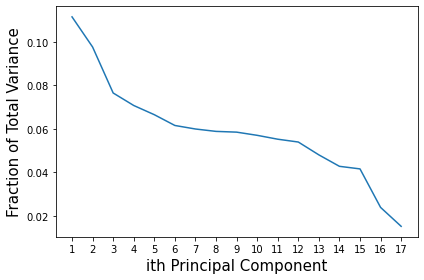

In [8]:
# find the number of pca
pc_nums = range(1, len(S) + 1)
plt.plot(pc_nums, S**2 / np.sum(S**2)) 
plt.xticks(pc_nums, pc_nums)
plt.xlabel('ith Principal Component', fontsize = 15)
plt.ylabel('Fraction of Total Variance', fontsize = 15)

Text(0, 0.5, 'PC1')

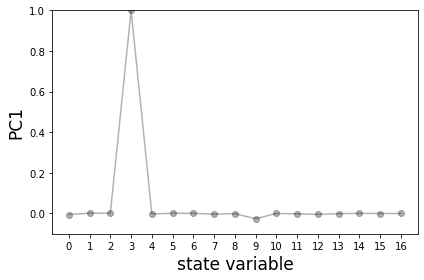

In [9]:
# show result of pc1
x = np.arange(17)
plt.plot(x,pca_crash.components_[0,:], 'o-', color='black', alpha=0.3)
plt.ylim([-0.1, 1])
plt.xticks(np.arange(0, 17, step=1))
plt.xlabel("state variable", fontsize = 17)
plt.ylabel("PC1", fontsize = 17)

Text(0, 0.5, 'PC2')

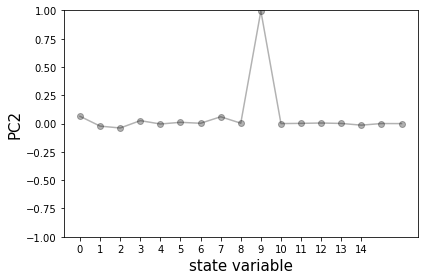

In [10]:
# show result of pc2
x = np.arange(17)
plt.plot(x,pca_crash.components_[1,:], 'o-', color='black', alpha=0.3)
plt.ylim([-1, 1])
plt.xticks(np.arange(0, 15, step=1))
plt.xlabel("state variable", fontsize = 15)
plt.ylabel("PC2", fontsize = 15)

Text(0, 0.5, 'PC3')

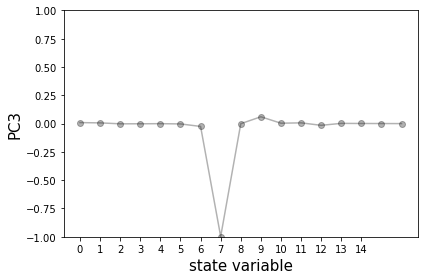

In [11]:
# show result of pc3
x = np.arange(17)
plt.plot(x,pca_crash.components_[2,:], 'o-', color='black', alpha=0.3)
plt.ylim([-1, 1])
plt.xticks(np.arange(0, 15, step=1))
plt.xlabel("state variable", fontsize = 15)
plt.ylabel("PC3", fontsize = 15)

In [12]:
name_state = ['TRAFFICWAY_TYPE', 'FIRST_CRASH_TYPE', 'TRAFFIC_CONTROL_DEVICE',
       'DRIVER_AGE', 'DRIVER_SEX', 'CRASH_MONTH', 'CRASH_DAY_OF_WEEK',
       'CRASH_HOUR', 'NUM_UNITS', 'POSTED_SPEED_LIMIT', 'ROAD_DEFECT',
       'ROADWAY_SURFACE_COND', 'LIGHTING_CONDITION', 'WEATHER_CONDITION',
       'DEVICE_CONDITION', 'ALIGNMENT', 'STREET_DIRECTION']
pca_np1=np.reshape(pca_crash.components_[0,:],(17,1))
pca_np2=np.reshape(pca_crash.components_[1,:],(17,1))
pca_np3=np.reshape(pca_crash.components_[2,:],(17,1))

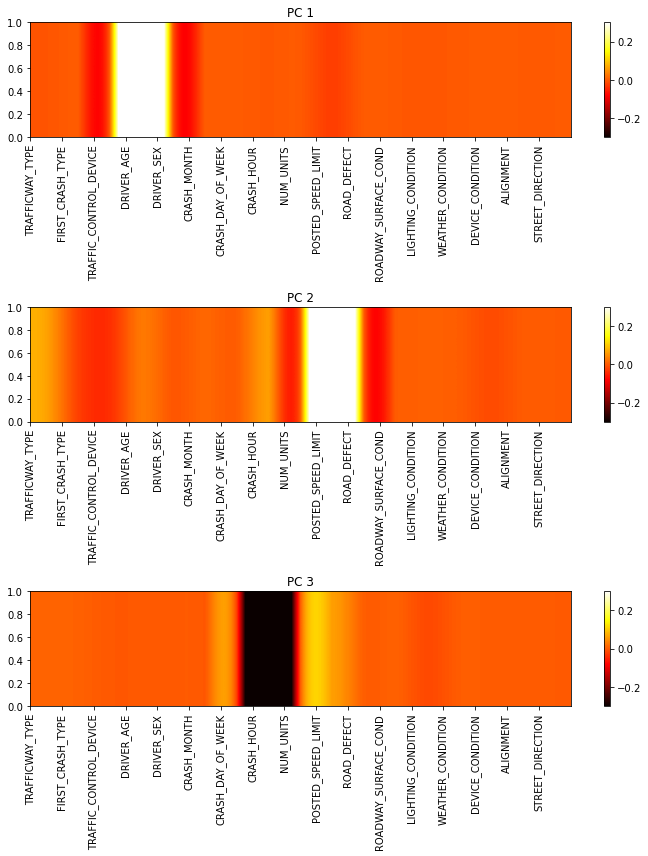

In [13]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=3, figsize=(10,12))

im=ax1.imshow(np.transpose(pca_np1),vmin=-0.3,vmax=0.3,extent=[0,17,0,1], aspect='auto',cmap=cm.hot,interpolation='spline16')
ax1.set_title('PC 1')
fig.colorbar(im, ax=ax1)
ax1.set_xticks(np.arange(0,17,1))
ax1.set_xticklabels(name_state,rotation=90 )

im2=ax2.imshow(np.transpose(pca_np2),vmin=-0.3,vmax=0.3,extent=[0,17,0,1], aspect='auto',cmap=cm.hot,interpolation='spline16')
ax2.set_title('PC 2')
fig.colorbar(im2, ax=ax2)
ax2.set_xticks(np.arange(0,17,1))
ax2.set_xticklabels(name_state, rotation=90)

im3=ax3.imshow(np.transpose(pca_np3),vmin=-0.3,vmax=0.3,extent=[0,17,0,1], aspect='auto',cmap=cm.hot,interpolation='spline16')
ax3.set_title('PC 3')
fig.colorbar(im3, ax=ax3)
ax3.set_xticks(np.arange(0,17,1))
ax3.set_xticklabels(name_state, rotation=90)

plt.tight_layout()
plt.show()

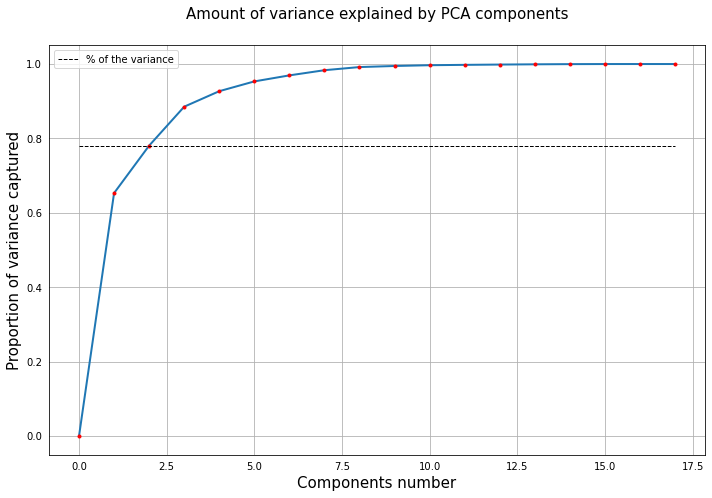

The first 3 PCs capture 78.07% of the variance


In [14]:
list_variance = pca_crash.explained_variance_ratio_
n_components=17

plt.figure(figsize = (10,7))
ax = plt.gca()
plt.plot(range(0, n_components+1), np.cumsum([0] + list(list_variance)),linewidth = 2)
plt.plot(range(0, n_components+1), np.cumsum([0] + list(list_variance)),'.',c='r',markersize = 6)
plt.plot(range(0, n_components+1),[sum(pca_crash.explained_variance_ratio_[0:2]) for i in range(0, n_components+1)],'--',c = 'black',
         linewidth = 1,label="% of the variance")
plt.legend()
plt.xlabel('Components number',fontsize = 15)
plt.ylabel('Proportion of variance captured',fontsize = 15)
plt.title('Amount of variance explained by PCA components',fontsize = 15, y = 1.05)
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
ax.grid(True)
plt.show()
print("The first 3 PCs capture {:.2f}%".format(100*(np.cumsum([0] + list(list_variance))[2])),"of the variance")

## 4.2 reconstruction

In [15]:
projected_data = pca_crash.fit_transform(crash_pca)
MBW_recons = pca_crash.inverse_transform(pca_crash.fit_transform(crash_pca))
print("The shape of the initial data is:", crash_pca.shape)
print("The shape of the projected data is:",projected_data.shape)

The shape of the initial data is: (532197, 17)
The shape of the projected data is: (532197, 17)


In [16]:
crash_pca.columns

Index(['TRAFFICWAY_TYPE', 'FIRST_CRASH_TYPE', 'TRAFFIC_CONTROL_DEVICE',
       'DRIVER_AGE', 'DRIVER_SEX', 'CRASH_MONTH', 'CRASH_DAY_OF_WEEK',
       'CRASH_HOUR', 'NUM_UNITS', 'POSTED_SPEED_LIMIT', 'ROAD_DEFECT',
       'ROADWAY_SURFACE_COND', 'LIGHTING_CONDITION', 'WEATHER_CONDITION',
       'DEVICE_CONDITION', 'ALIGNMENT', 'STREET_DIRECTION'],
      dtype='object')

In [17]:
crash_pca_np = crash_pca.to_numpy()
crash_pca_np.shape

(532197, 17)

In [18]:
crash_pca_np

array([[1, 0, 4, ..., 2, 0, 1],
       [1, 1, 1, ..., 1, 0, 1],
       [2, 1, 4, ..., 2, 0, 1],
       ...,
       [5, 9, 4, ..., 2, 0, 1],
       [5, 1, 4, ..., 0, 0, 1],
       [5, 2, 1, ..., 1, 0, 1]])

In [19]:
MBW_recons

array([[ 1.00000000e+00,  4.64517314e-12,  4.00000000e+00, ...,
         2.00000000e+00,  2.97180683e-13,  1.00000000e+00],
       [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
         1.00000000e+00, -3.88578059e-15,  1.00000000e+00],
       [ 2.00000000e+00,  1.00000000e+00,  4.00000000e+00, ...,
         2.00000000e+00,  1.55405203e-13,  1.00000000e+00],
       ...,
       [ 5.00000000e+00,  9.00000000e+00,  4.00000000e+00, ...,
         2.00000000e+00, -7.38992201e-16,  1.00000000e+00],
       [ 5.00000000e+00,  1.00000000e+00,  4.00000000e+00, ...,
         1.33226763e-14,  7.00828284e-16,  1.00000000e+00],
       [ 5.00000000e+00,  2.00000000e+00,  1.00000000e+00, ...,
         1.00000000e+00, -1.05991604e-15,  1.00000000e+00]])

In [20]:
import seaborn as sns

In [21]:
crash_np_DRIVER_AGE = crash_pca_np[:,3]
MBW_recons_DRIVER_AGE = MBW_recons[:,3]

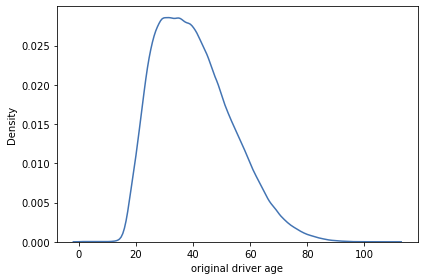

In [22]:
colors = ["#4374B3"]
customPalette = sns.set_palette(sns.color_palette(colors))
ax = sns.kdeplot((crash_np_DRIVER_AGE), palette=customPalette)
ax.set(xlabel='original driver age', )
plt.show()

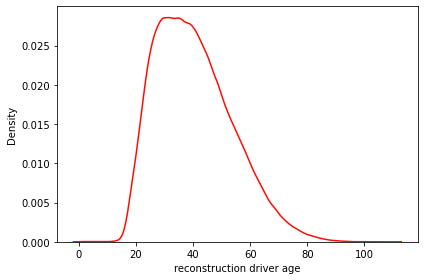

In [23]:
colors = ["#FF0B04"]
customPalette = sns.set_palette(sns.color_palette(colors))
ax = sns.kdeplot((MBW_recons_DRIVER_AGE), palette=customPalette)
ax.set(xlabel='reconstruction driver age')
plt.show()

In [24]:
crash_np_CRASH_HOUR = crash_pca_np[:,7]
MBW_recons_CRASH_HOUR = MBW_recons[:,7]

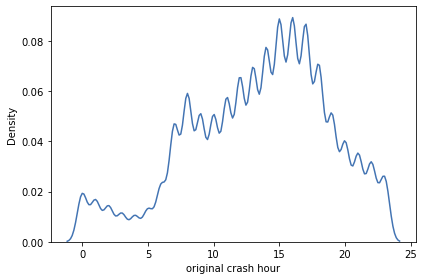

In [25]:
colors = ["#4374B3"]
customPalette = sns.set_palette(sns.color_palette(colors))
ax = sns.kdeplot((crash_np_CRASH_HOUR),palette=customPalette)
ax.set(xlabel='original crash hour')
plt.show()

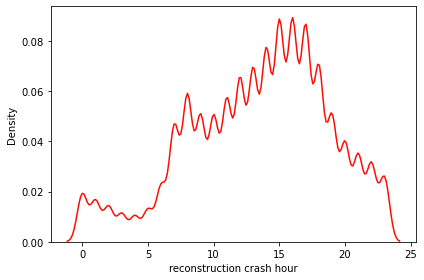

In [26]:
colors = ["#FF0B04"]
customPalette = sns.set_palette(sns.color_palette(colors))
ax = sns.kdeplot((MBW_recons_CRASH_HOUR), palette=customPalette)
ax.set(xlabel='reconstruction crash hour')
plt.show()

In [27]:
crash_np_SPEED_LIMIT = crash_pca_np[:,9]
MBW_recons_SPEED_LIMIT = MBW_recons[:,9]

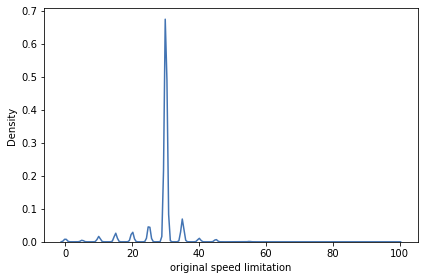

In [28]:
colors = ["#4374B3"]
customPalette = sns.set_palette(sns.color_palette(colors))
ax = sns.kdeplot((crash_np_SPEED_LIMIT), palette=customPalette)
ax.set(xlabel='original speed limitation')
plt.show()

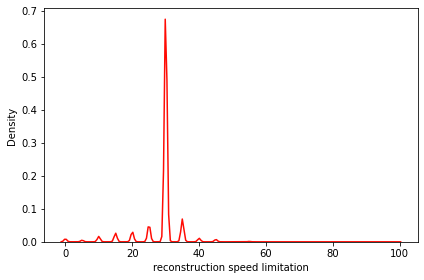

In [29]:
colors = ["#FF0B04"]
customPalette = sns.set_palette(sns.color_palette(colors))
ax = sns.kdeplot((MBW_recons_SPEED_LIMIT),palette=customPalette)
ax.set(xlabel='reconstruction speed limitation')
plt.show()

In [30]:
"""  MSE Error """
print(np.mean((crash_pca_np - MBW_recons)**2))

1.7229313896724127e-27


In [31]:
print('Accuracy: ',1.00-np.sum(np.square((crash_pca-MBW_recons)))/np.sum(np.square(crash_pca)))

Accuracy:  TRAFFICWAY_TYPE           1.0
FIRST_CRASH_TYPE          1.0
TRAFFIC_CONTROL_DEVICE    1.0
DRIVER_AGE                1.0
DRIVER_SEX                1.0
CRASH_MONTH               1.0
CRASH_DAY_OF_WEEK         1.0
CRASH_HOUR                1.0
NUM_UNITS                 1.0
POSTED_SPEED_LIMIT        1.0
ROAD_DEFECT               1.0
ROADWAY_SURFACE_COND      1.0
LIGHTING_CONDITION        1.0
WEATHER_CONDITION         1.0
DEVICE_CONDITION          1.0
ALIGNMENT                 1.0
STREET_DIRECTION          1.0
dtype: float64
